# Convolutional Neural Network on Audio Classification

## Objective: We have 10 artists, each artist has 10 songs. We are going to create a CNN to train on these data. The model objective is to identify the artist when we feed it a random song (not including the songs it was trained on) from any of these 10 artists. 




<div>
    <h2>Concept Overview</h2>
    <p>The fundamental idea is to treat a song as a complex set of patterns that can be captured and quantified through audio features. Each artist tends to have distinctive elements in their music—whether it's their voice, style of playing instruments, rhythm, or even production techniques. The CNN learns to recognize these patterns and attributes them to the correct artist.</p>
    <h2>Why Use CNNs for Audio?</h2>
    <p>CNNs are traditionally known for their prowess in image recognition tasks, where they excel at detecting hierarchical patterns in spatial data. When audio data is transformed into a spectrogram (a visual representation of the spectrum of frequencies in a sound as they vary with time), the problem of identifying features in audio data becomes analogous to image recognition. This makes CNNs a powerful tool for analyzing and classifying audio data.</p>
    <h2>Key Steps in the Project:</h2>
    <ul>
        <li><strong>Data Collection</strong>:
            <ul>
                <li>Gather multiple songs from each artist you want to include in the model. The more varied the samples per artist, the better the model can learn the general characteristics of each artist's music.</li>
            </ul>
        </li>
        <li><strong>Preprocessing</strong>:
            <ul>
                <li>Convert audio files into spectrograms using audio processing libraries like <code>librosa</code>.</li>
                <li>Normalize these spectrograms so that the model isn't biased by variations in loudness or duration.</li>
            </ul>
        </li>
        <li><strong>Feature Engineering</strong>:
            <ul>
                <li>Extract features like Mel-Frequency Cepstral Coefficients (MFCCs) which effectively capture the timbre of the sound.</li>
                <li>Additional spectral features can provide information about the tonal content of the music.</li>
            </ul>
        </li>
        <li><strong>Model Design</strong>:
            <ul>
                <li>Design a CNN architecture suitable for the complexity and size of your data.</li>
                <li>Implement techniques such as dropout and batch normalization to prevent overfitting.</li>
            </ul>
        </li>
        <li><strong>Training the Model</strong>:
            <ul>
                <li>Choose an appropriate loss function and optimizer.</li>
                <li>Use a separate validation set to monitor the model's performance during training.</li>
            </ul>
        </li>
        <li><strong>Evaluation and Testing</strong>:
            <ul>
                <li>Evaluate the model's performance on a separate test set that was not used during the training phase.</li>
                <li>Use accuracy, precision, recall, and F1-score to assess performance.</li>
            </ul>
        </li>
    </ul>
    <h2>Practical Applications:</h2>
    <ul>
        <li>Enhancing music recommendation systems by understanding artist similarities.</li>
        <li>Automatically tagging songs with artist labels in large music databases.</li>
        <li>Finding songs that are stylistically similar to a given track.</li>
    </ul>
    <h2>Challenges:</h2>
    <ul>
        <li>Variability in Live Recordings vs. Studio Tracks.</li>
        <li>Similarities Between Artists within the same genre or collaborations may share similar audio characteristics, making differentiation more challenging.</li>
    </ul>

In [ ]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import IPython.display as ipd

os.chdir(os.path.expanduser('~/Desktop'))

## Data Preprocessing

In [2]:
def generate_features(y, sr, max_pad_len=1000):
    # Generate a Mel-spectrogram.
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=9600, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)

    # Check if padding or trimming is needed
    if S_DB.shape[1] < max_pad_len:
        # Pad the spectrogram to ensure uniform size
        pad_width = max_pad_len - S_DB.shape[1]
        S_DB = np.pad(S_DB, pad_width=((0, 0), (0, pad_width)), mode='constant')
    elif S_DB.shape[1] > max_pad_len:
        # Trim the spectrogram if it's longer than max_pad_len
        S_DB = S_DB[:, :max_pad_len]

    return S_DB

# Update the loop to process and generate feature sets
def process_audio_files(base_path):
    df_chunks = []
    for artist_folder in glob.glob(os.path.join(base_path, '*')):
        artist_name = os.path.basename(artist_folder)
        for song_file in glob.glob(os.path.join(artist_folder, '*.mp3')):
            y, sr = librosa.load(song_file, sr=None)
            features = generate_features(y, sr)
            temp_df = pd.DataFrame({
                'Artist': [artist_name],
                'SongFile': [song_file],
                'Features': [features]
            })
            df_chunks.append(temp_df)
    return pd.concat(df_chunks, ignore_index=True)

audio_data_df = process_audio_files('Spotify_Music')

In [3]:
audio_data_df.loc[audio_data_df['Artist'] == 'Justin_Bieber']

,Artist,SongFile,Features
0,Justin_Bieber,Spotify_Music/Justin_Bieber/Company.mp3,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
1,Justin_Bieber,Spotify_Music/Justin_Bieber/Anyone.mp3,"[[-80.0, -80.0, -59.71844, -54.765244, -80.0, ..."
2,Justin_Bieber,Spotify_Music/Justin_Bieber/Off My Face.mp3,"[[-80.0, -46.233753, -55.18285, -62.320576, -5..."
3,Justin_Bieber,Spotify_Music/Justin_Bieber/One Time.mp3,"[[-80.0, -80.0, -80.0, -10.375135, -19.041801,..."
4,Justin_Bieber,Spotify_Music/Justin_Bieber/Love Yourself.mp3,"[[-80.0, -80.0, -80.0, -64.03427, -47.071095, ..."
5,Justin_Bieber,Spotify_Music/Justin_Bieber/Ghost.mp3,"[[-80.0, -80.0, -70.54418, -80.0, -78.856125, ..."
6,Justin_Bieber,Spotify_Music/Justin_Bieber/Yummy.mp3,"[[-80.0, -80.0, -70.77206, -80.0, -76.280914, ..."
7,Justin_Bieber,Spotify_Music/Justin_Bieber/Sorry.mp3,"[[-80.0, -58.331867, -54.926258, -54.856445, -..."
8,Justin_Bieber,Spotify_Music/Justin_Bieber/What Do You Mean_.mp3,"[[-80.0, -47.043274, -66.683914, -65.69771, -6..."
9,Justin_Bieber,Spotify_Music/Justin_Bieber/Boyfriend.mp3,"[[-80.0, -70.62306, -71.08181, -67.859566, -75..."


## Training data encoding and more processing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming each row in `audio_data_df` now includes a 'Features' column with spectrogram data.
X = np.array(list(audio_data_df['Features']))
y = audio_data_df['Artist'].values

# Add a channel dimension and normalize
X = X[..., np.newaxis] / -80.0  # Normalizing assuming dB range -80 to 0

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


## Create a basic model of CNN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

def build_cnn_model(input_shape, num_classes):
    model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    MaxPooling2D((2, 4)),
    Dropout(0.3),  # Increased dropout
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 4)),
    Dropout(0.3),  # Increased dropout
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

    model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])  
    return model

# Initialize the model
model = build_cnn_model(X.shape[1:], len(np.unique(y_encoded)))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 998, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 249, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 63, 249, 32)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 247, 64)       18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 61, 64)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 30, 61, 64)       

## Loading Test data

In [6]:
audio_data_df_test = process_audio_files('Spotify_Test_Data')
audio_data_df_test.loc[audio_data_df_test['Artist'] == 'Justin_Bieber']

# Assuming each row in `audio_data_df` now includes a 'Features' column with spectrogram data.
X_test = np.array(list(audio_data_df_test['Features']))
y_test = audio_data_df_test['Artist'].values

# Add a channel dimension and normalize
X_test = X_test[..., np.newaxis] / -80.0  # Normalizing assuming dB range -80 to 0

# Encode labels
label_encoder = LabelEncoder()
y_encoded_test = label_encoder.fit_transform(y_test)
y_categorical_test = to_categorical(y_encoded_test)

## Model training

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=15, restore_best_weights=True)

history = model.fit(
    X, y_categorical,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_categorical_test),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
4/4 [==============================] - 4s 909ms/step - loss: 13.7455 - accuracy: 0.1100 - val_loss: 5.5158 - val_accuracy: 0.1000
Epoch 2/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 4s 879ms/step - loss: 10.7771 - accuracy: 0.0700 - val_loss: 4.8585 - val_accuracy: 0.1000
Epoch 3/100
4/4 [==============================] - 4s 828ms/step - loss: 5.0889 - accuracy: 0.1200 - val_loss: 4.9288 - val_accuracy: 0.1000
Epoch 4/100
4/4 [==============================] - 4s 883ms/step - loss: 4.9036 - accuracy: 0.1500 - val_loss: 4.8476 - val_accuracy: 0.1333
Epoch 5/100
4/4 [==============================] - 4s 853ms/step - loss: 4.8001 - accuracy: 0.1800 - val_loss: 4.6803 - val_accuracy: 0.1333
Epoch 6/100
4/4 [==============================] - 4s 864ms/step - loss: 4.6188 - accuracy: 0.2100 - val_loss: 4.4801 - val_accuracy: 0.1333
Epoch 7/100
4/4 [==============================] - 4s 859ms/step - loss: 4.4045 - accuracy: 0.2200 - val_loss: 4.2655 - val_accuracy: 0.1333
Epoch 8/100
4/4 [==============================] - 4s 867ms/step - loss: 4.1785 - accuracy: 0.2000 - val_loss: 4.0503 - val_accuracy: 0.1333
Epoch 9/100
4/4 [=======

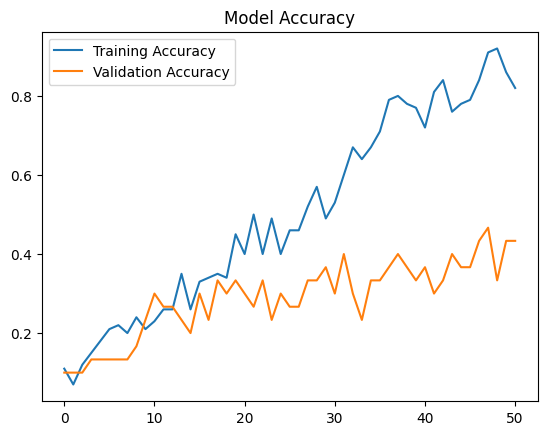

In [27]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

### The model achieved a 0.4 validation accuracy. This is a basic model and the training data is very small (10 songs for each of the 10 artist). If we were to get more training data, this model can perform decently to classify the artists from a given song. 